In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')

# Importing the Dataset

In [4]:
df = pd.read_csv(r'C:\Users\HP\Downloads\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

 # Univariate Analysis

In [6]:
df.describe()
# as the mean and 50%(mode) are similar we can say that this is normal distribution

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Distplot for Age

<Axes: xlabel='Age', ylabel='Density'>

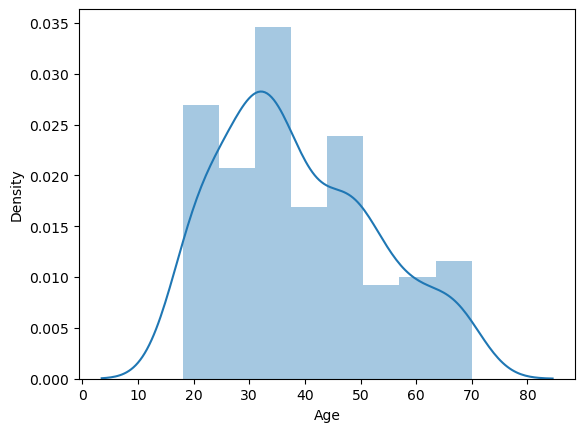

In [7]:
sns.distplot(df['Age'])

### Distplot for Income

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

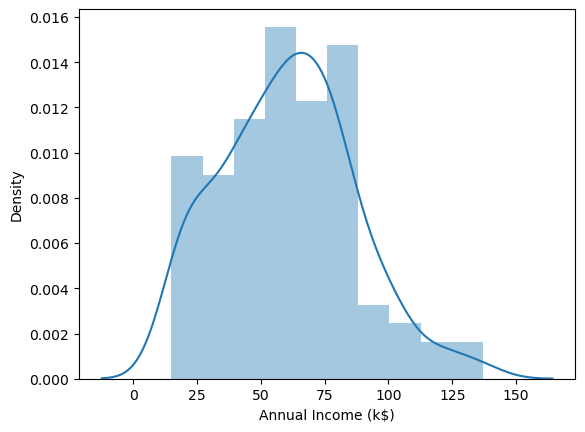

In [8]:
sns.distplot(df['Annual Income (k$)'])

### Distplot for Spending Score

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

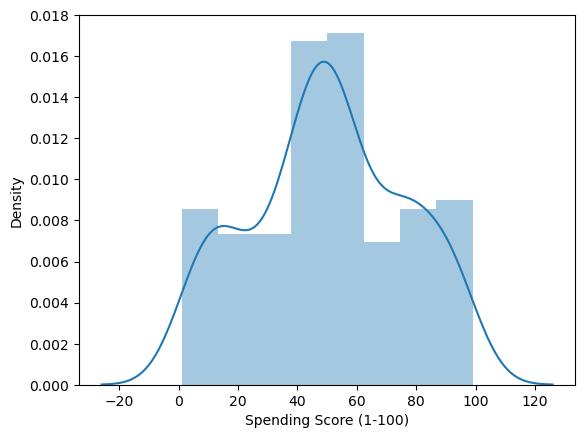

In [9]:
sns.distplot(df['Spending Score (1-100)'])

### KDEplot for Age

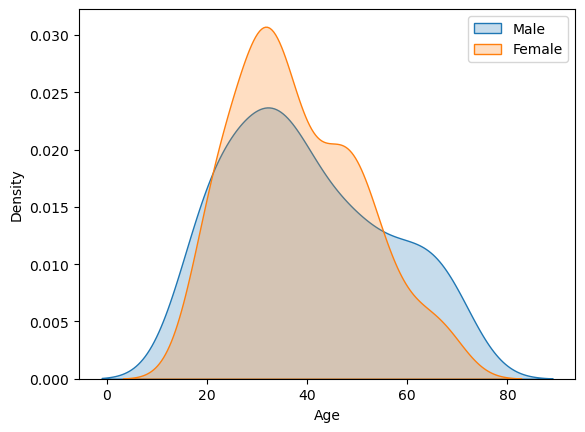

In [10]:
sns.kdeplot(df[df['Gender'] == 'Male'], x = 'Age', label = 'Male' ,shade = True)
sns.kdeplot(df[df['Gender'] == 'Female'], x = 'Age', label= 'Female', shade = True)
plt.legend()

### KDEplot for Annual Income

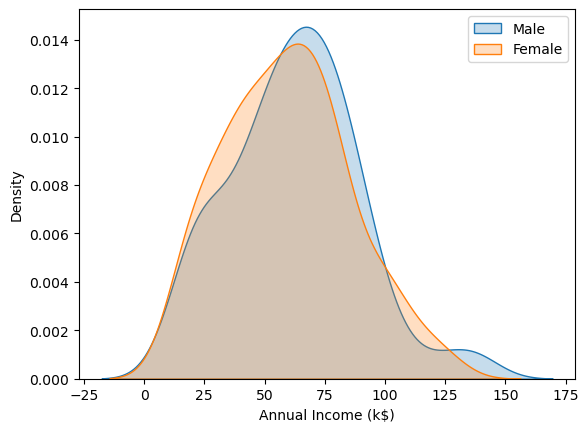

In [11]:
sns.kdeplot(df[df['Gender'] == 'Male'], x= 'Annual Income (k$)', shade=True, label = 'Male')
sns.kdeplot(df[df['Gender'] == 'Female'], x = 'Annual Income (k$)', shade =True, label = 'Female')
plt.legend()

### KDEplot for Spending Score

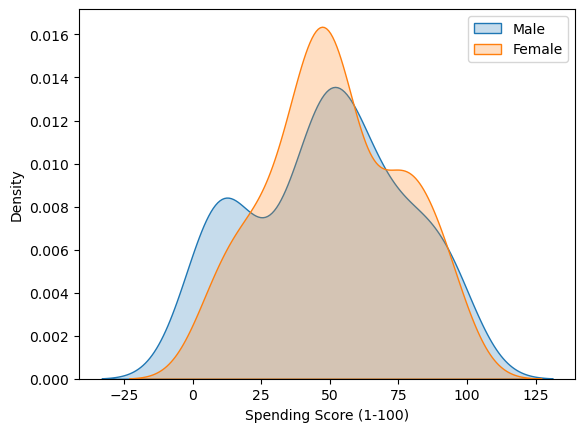

In [12]:
sns.kdeplot(df[df['Gender'] == 'Male'], x = 'Spending Score (1-100)', label = 'Male' ,shade = True)
sns.kdeplot(df[df['Gender'] == 'Female'], x = 'Spending Score (1-100)', label = 'Female', shade = True)
plt.legend()

### Percentage of Male and Female in the Dataset

In [13]:
df.Gender.value_counts(normalize=True) *100

Female    56.0
Male      44.0
Name: Gender, dtype: float64

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

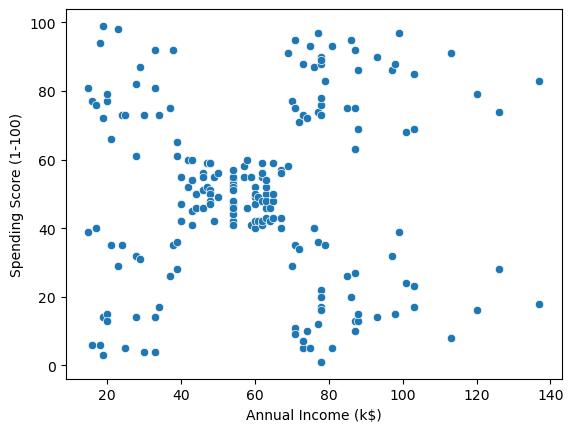

In [14]:
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)')

In [15]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


# Clustering - Univariate, Bivariate, Multivariate

## Univariate

In [37]:
clustering1 = KMeans(n_clusters=3)

In [38]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [39]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [40]:
df['Income Cluster'] = clustering1.labels_

In [41]:
df['Income Cluster'].value_counts()

2    92
0    72
1    36
Name: Income Cluster, dtype: int64

In [42]:
clustering1.inertia_

23528.152173913055

In [43]:
inertia_scores  = []

In [44]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [45]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23528.152173913055,
 13308.108021390373,
 8481.496190476191,
 5050.904761904763,
 3949.2756132756135,
 2975.9514374514374,
 2211.8055555555557,
 1734.1677489177487]

## Elbow Method 

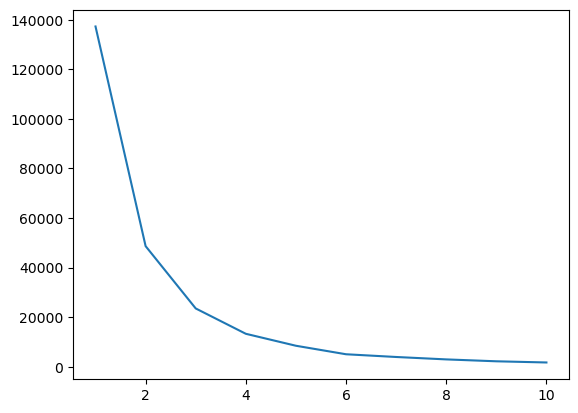

In [82]:
plt.plot(range(1,11), inertia_scores)

## Bivariate

In [56]:
clustering2 = KMeans(n_clusters=5)

In [57]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [58]:
clustering2.fit(df[['Annual Income (k$)',
       'Spending Score (1-100)']])

KMeans(n_clusters=5)

In [59]:
inertia_scores2 = []
for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)',
       'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

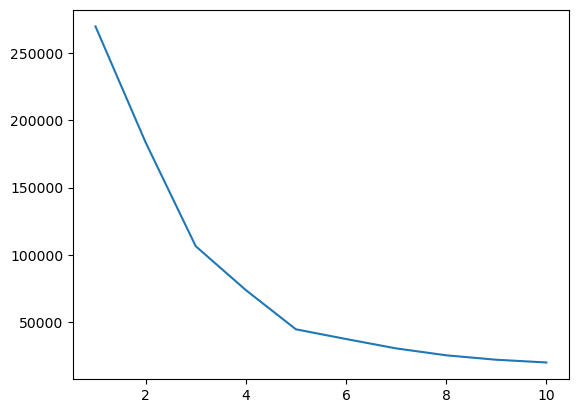

In [60]:
plt.plot(range(1,11), inertia_scores2)

In [61]:
df['Income and Spending Cluster'] = clustering2.labels_

In [64]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster',
       'Income and Spending Cluster'],
      dtype='object')

In [75]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

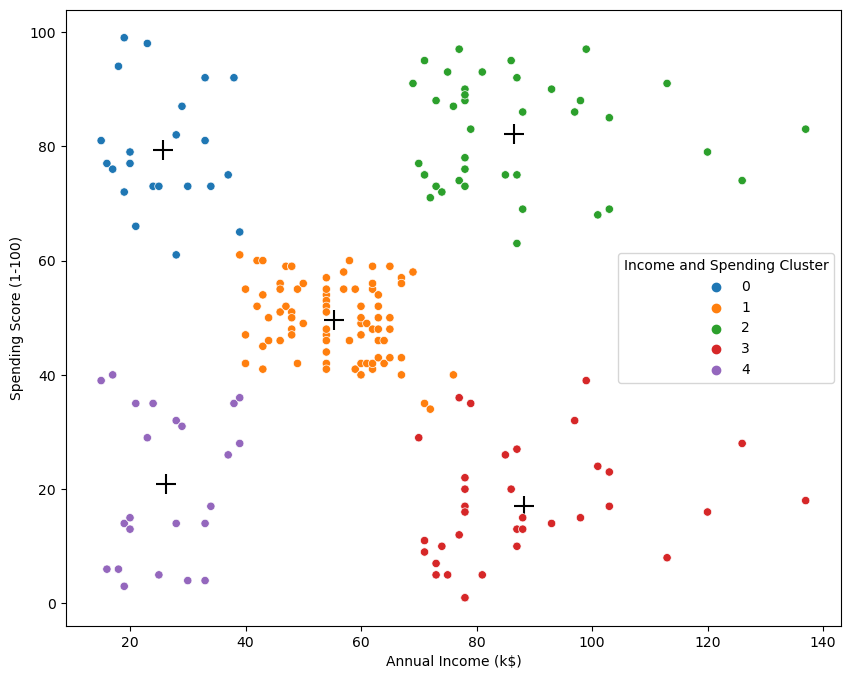

In [81]:
plt.figure(figsize= (10,8))
plt.scatter(x = centers['x'], y = centers['y'], s = 200, marker='+', color = 'black')
sns.scatterplot(data=df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Income and Spending Cluster', palette= 'tab10')

# Multivariate Clustering

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scale = StandardScaler()

In [85]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and Spending Cluster
0,1,Male,19,15,39,0,4
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,4


In [86]:
df['Gender'] = df['Gender'].replace({'Male': '1', 'Female': '0'})

In [89]:
columns_to_remove = ['Income Cluster', 'Income and Spending Cluster']

In [92]:
df = df.drop(columns=columns_to_remove)

In [94]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [96]:
df = scale.fit_transform(df)